# Machine Learning (30 marks)
 
<hr />

1 Select Important Features and create a dataframe

<hr />

1 Split Data to train, test, validate

2 Train Model

3 Test Model

4 Evaluate Model using evaluation matrices
 
<hr />

1 Hyper Parameter tuning to improve performance

2 Save Model to a pickle file

3 Predict values for validate set using pickle file

4 Write validate set along with it's predicted values to csv file


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

### 1. Load csv file in notebook using python code

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### 2. Selecting the important features

    The un-important feature from dataset is ID. As the id is only used for indexing.
    
    Rest all the features are important as per my opinion.

In [3]:
# Dropping ID Column
data.drop(['id'], axis=1, inplace=True)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### 3. Performing necessary operations

#### a. Remove null values

In [4]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

28.893236911794666
28.1


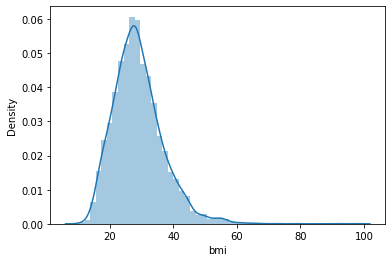

In [5]:
# Plotting bmi chart
sns.distplot(data.bmi)

print(data.bmi.mean())
print(data.bmi.median())

In [6]:
# The bmi value is continous and skewed, we can use median to fill the null values

# In skewed data, the mean is biased by the values at the far end of the distribution. So it is better to use median.

print('The Median value for bmi column is - ', data.bmi.median())
data["bmi"].fillna(data.bmi.median(), inplace = True)
data.head()

The Median value for bmi column is -  28.1


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#### a. Scaling - For all numerical columns

In [7]:
# age, hypertension, heart_disease, avg_glucose_level, bmi, stroke are the numerical columns.
from sklearn.preprocessing import StandardScaler

colList = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

scaler = StandardScaler()

scaledData = data[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
scaledData = pd.DataFrame(scaler.fit_transform(scaledData), columns=colList)
print(scaledData)

           age  hypertension  heart_disease  avg_glucose_level       bmi
0     1.051434     -0.328602       4.185032           2.706375  1.005086
1     0.786070     -0.328602      -0.238947           2.121559 -0.098981
2     1.626390     -0.328602       4.185032          -0.005028  0.472536
3     0.255342     -0.328602      -0.238947           1.437358  0.719327
4     1.582163      3.043196      -0.238947           1.501184 -0.631531
...        ...           ...            ...                ...       ...
5105  1.626390      3.043196      -0.238947          -0.494658 -0.098981
5106  1.670617     -0.328602      -0.238947           0.420775  1.446713
5107 -0.363842     -0.328602      -0.238947          -0.511443  0.225745
5108  0.343796     -0.328602      -0.238947           1.328257 -0.423706
5109  0.034205     -0.328602      -0.238947          -0.460867 -0.345772

[5110 rows x 5 columns]


In [8]:
# now add the scaled data into actual data
data['age'] = scaledData['age'] 
data['hypertension'] = scaledData['hypertension']
data['heart_disease'] = scaledData['heart_disease']
data['avg_glucose_level'] = scaledData['avg_glucose_level']
data['bmi'] = scaledData['bmi']

In [9]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,1.051434,-0.328602,4.185032,Yes,Private,Urban,2.706375,1.005086,formerly smoked,1
1,Female,0.786070,-0.328602,-0.238947,Yes,Self-employed,Rural,2.121559,-0.098981,never smoked,1
2,Male,1.626390,-0.328602,4.185032,Yes,Private,Rural,-0.005028,0.472536,never smoked,1
3,Female,0.255342,-0.328602,-0.238947,Yes,Private,Urban,1.437358,0.719327,smokes,1
4,Female,1.582163,3.043196,-0.238947,Yes,Self-employed,Rural,1.501184,-0.631531,never smoked,1


#### B. Encoding - For all categorical columns

In [10]:
# Get the columns which has categorical values
category_data = data.select_dtypes(include=['object']).copy()
category_data.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Encode all categorical columns
colList = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for i in colList:
    encoder.fit(data[i])
    data[i] = encoder.transform(data[i])

data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,1.051434,-0.328602,4.185032,1,2,1,2.706375,1.005086,1,1
1,0,0.786070,-0.328602,-0.238947,1,3,0,2.121559,-0.098981,2,1
2,1,1.626390,-0.328602,4.185032,1,2,0,-0.005028,0.472536,2,1
3,0,0.255342,-0.328602,-0.238947,1,2,1,1.437358,0.719327,3,1
4,0,1.582163,3.043196,-0.238947,1,3,0,1.501184,-0.631531,2,1


### 4. Splitting the Data to train, test, validate

In [12]:
# Getting x and y values

x = data.iloc[:, :-1]
y = data.iloc[:, -1]

print(x.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')


In [13]:
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,1.051434,-0.328602,4.185032,1,2,1,2.706375,1.005086,1
1,0,0.786070,-0.328602,-0.238947,1,3,0,2.121559,-0.098981,2
2,1,1.626390,-0.328602,4.185032,1,2,0,-0.005028,0.472536,2
3,0,0.255342,-0.328602,-0.238947,1,2,1,1.437358,0.719327,3
4,0,1.582163,3.043196,-0.238947,1,3,0,1.501184,-0.631531,2


In [14]:
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64


In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

x_vtrain, x_validate, y_vtrain, y_validate = train_test_split(x_train, y_train, test_size = 0.25,train_size =0.75, random_state=5)

### 5. Train Model

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

### 6. Test Model

In [17]:
y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 0 ... 0 0 0]


### 7. Evaluate Model using evaluation matrices

In [18]:
print ("Accuracy : ", accuracy_score(y_test, y_pred)*100)

Accuracy :  95.10763209393346


<AxesSubplot:>

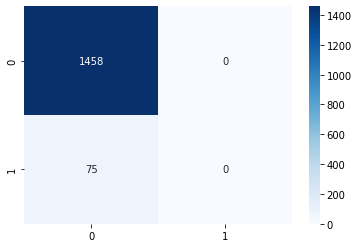

In [19]:
from sklearn.metrics import confusion_matrix

con = confusion_matrix(y_test, y_pred)
sns.heatmap(con,annot=True, fmt='', cmap='Blues')

### 8. Hyper Parameter tuning to improve performance

### 9. Save Model to a pickle file

In [20]:
import pickle

with open('logistic_pkl', 'wb') as files:
    pickle.dump(classifier, files)

### 10. Predict values for validate set using pickle file

In [21]:
# load saved model
with open('logistic_pkl' , 'rb') as f:
    model = pickle.load(f)

In [22]:
# check prediction for the validation set

y_val_pred = classifier.predict(x_validate)

In [23]:
print ("Accuracy : ", accuracy_score(y_validate, y_val_pred)*100)

Accuracy :  94.1899441340782


<AxesSubplot:>

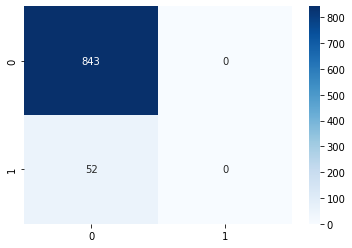

In [24]:
con = confusion_matrix(y_validate, y_val_pred)
sns.heatmap(con,annot=True, fmt='', cmap='Blues')

### 11. Write validate set along with it's predicted values to csv file

In [25]:
x_validate.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [26]:
resultData = pd.DataFrame(columns=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'avg_glucose_level', 'bmi','smoking_status', 'Stroke_actual', 'Stroke_predicted'])
print(resultData)

Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, Stroke_actual, Stroke_predicted]
Index: []


In [27]:
resultData.gender = x_validate.gender
resultData.age = x_validate.age
resultData.hypertension = x_validate.hypertension
resultData.heart_disease = x_validate.heart_disease
resultData.ever_married = x_validate.ever_married
resultData.work_type = x_validate.work_type
resultData.Residence_type = x_validate.Residence_type
resultData.avg_glucose_level = x_validate.avg_glucose_level
resultData.bmi = x_validate.bmi
resultData.smoking_status = x_validate.smoking_status
resultData.Stroke_actual = y_validate
resultData.Stroke_predicted = y_val_pred

In [28]:
resultData.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Stroke_actual,Stroke_predicted
3625,1,1.537935,-0.328602,4.185032,1,3,0,2.218954,-0.111970,1,0,0
2879,0,-0.452296,3.043196,-0.238947,0,2,0,-0.182814,-0.098981,3,0,0
3326,0,-0.894570,-0.328602,-0.238947,0,2,0,-0.682382,1.407746,1,0,0
1421,1,-1.513753,-0.328602,-0.238947,0,4,1,-0.492891,-0.228871,0,0,0
2320,0,0.564933,-0.328602,-0.238947,1,2,1,0.155752,1.277855,3,0,0


In [29]:
resultData.to_csv('validation-set-predicted-values.csv', index=False)